___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [2]:
tree = pd.read_csv("treetypes.csv")
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [4]:
tree.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2748.505160,156.212172,16.331052,228.094032,50.897820,1719.966576,212.370488,218.510700,134.502764,1521.756904,...,0.041580,0.039880,0.001500,0.006464,0.000396,0.001852,0.046020,0.041388,0.026892,4.000320
std,418.300975,109.652847,8.317490,209.630153,61.006967,1330.817603,30.654582,22.680947,46.033892,1107.378373,...,0.199628,0.195678,0.038701,0.080139,0.019896,0.042995,0.209529,0.199186,0.161768,2.001108
min,1859.000000,0.000000,0.000000,0.000000,-163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2375.000000,65.000000,10.000000,66.000000,5.000000,756.000000,195.000000,206.000000,106.000000,734.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2753.000000,125.000000,15.000000,180.000000,32.000000,1318.000000,220.000000,222.000000,137.000000,1273.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3108.000000,260.000000,22.000000,330.000000,79.000000,2294.000000,235.000000,235.000000,167.000000,1998.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3857.000000,360.000000,65.000000,1390.000000,598.000000,7112.000000,254.000000,254.000000,252.000000,7150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
for col in tree.columns:
    print("Column", col, "has", tree[col].nunique(), "unique values")

Column Elevation has 1983 unique values
Column Aspect has 361 unique values
Column Slope has 59 unique values
Column Horizontal_Distance_To_Hydrology has 1294 unique values
Column Vertical_Distance_To_Hydrology has 578 unique values
Column Horizontal_Distance_To_Roadways has 6501 unique values
Column Hillshade_9am has 207 unique values
Column Hillshade_Noon has 165 unique values
Column Hillshade_3pm has 253 unique values
Column Horizontal_Distance_To_Fire_Points has 6487 unique values
Column Wilderness_Area_1 has 2 unique values
Column Wilderness_Area_2 has 2 unique values
Column Wilderness_Area_3 has 2 unique values
Column Wilderness_Area_4 has 2 unique values
Column Soil_Type_1 has 2 unique values
Column Soil_Type_2 has 2 unique values
Column Soil_Type_3 has 2 unique values
Column Soil_Type_4 has 2 unique values
Column Soil_Type_5 has 2 unique values
Column Soil_Type_6 has 2 unique values
Column Soil_Type_7 has 2 unique values
Column Soil_Type_8 has 2 unique values
Column Soil_Type_9

>### Summary results :
>- ``"Elevation"``, `"Slope"`, `"Horizontal_Distance_To_Hydrology"`, `"Vertical_Distance_To_Hydrology"`, `"Horizontal_Distance_To_Roadways"`, `"Horizontal_Distance_To_Fire_Points"` are continuous variables and their values vary.
>- `"Aspect"` is also continuous and its values vary from 0 to 360. It has angular values.
>- ``"Hillshade_3pm"``, ``"Hillshade_Noon"``, ``"Hillshade_3pm"`` are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
>- ``Wilderness_Areas`` and `Soil_Types` are categorical (binary 1 or 0) data.

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64


<AxesSubplot:ylabel='Cover_Type'>

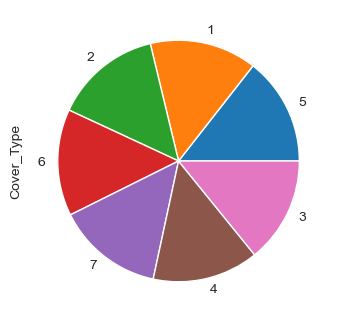

In [6]:
# There are 7 types of trees in the forest district.
print(tree.Cover_Type.value_counts())
tree.Cover_Type.value_counts().plot.pie()

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [7]:
# There is no missing value

tree.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [8]:
# to get list of continious features
numeric = []

for col in tree.columns:
    if tree[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


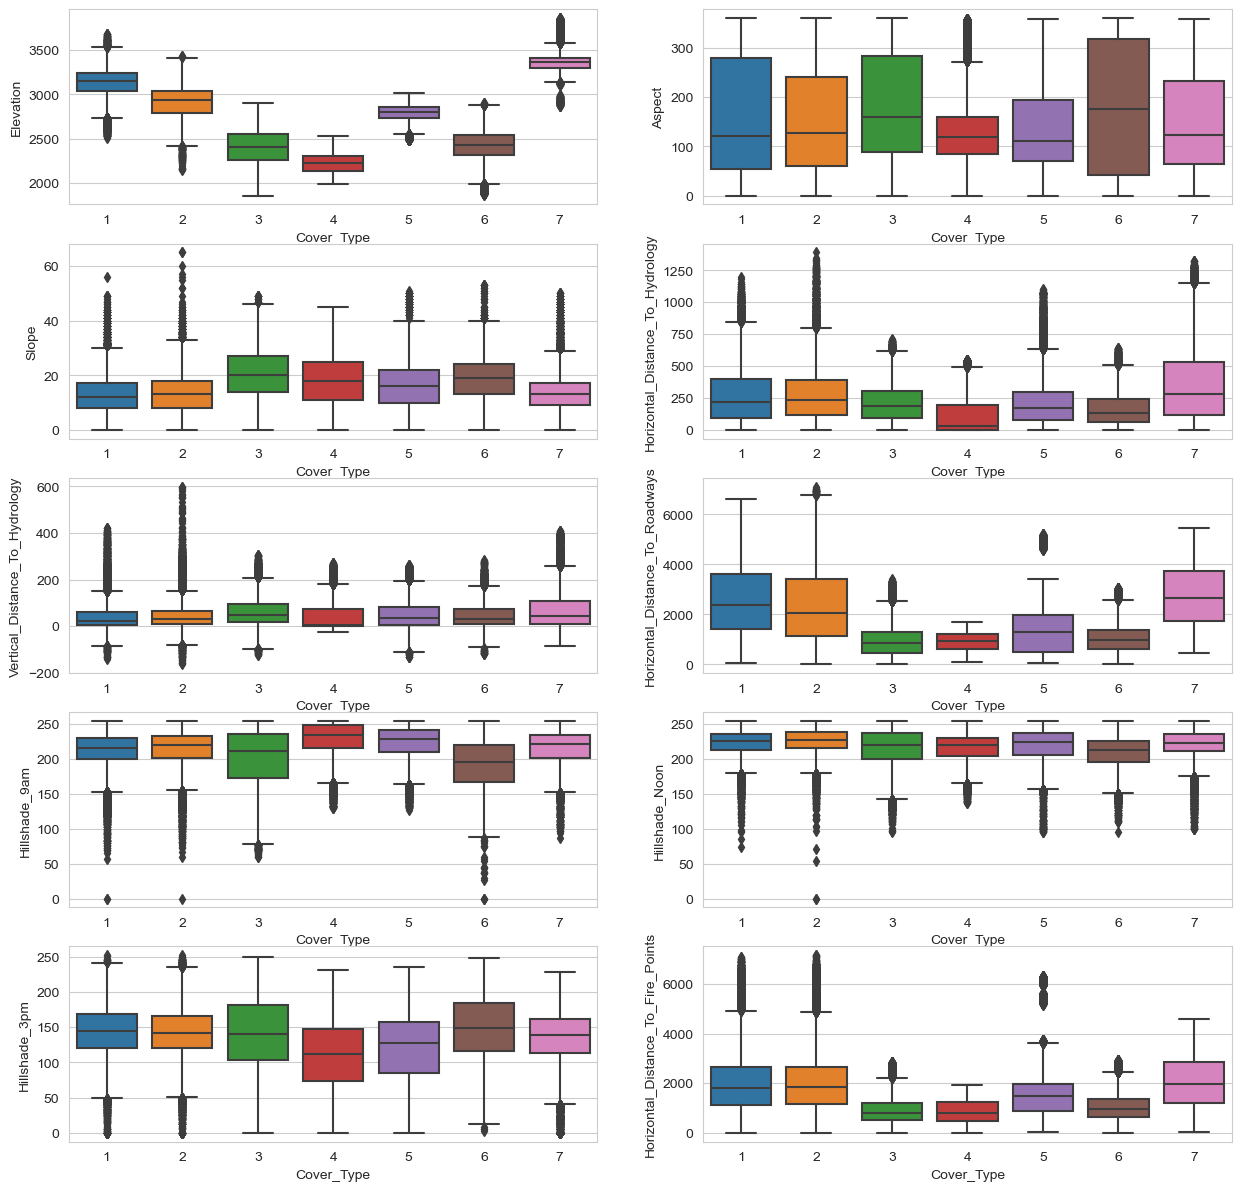

In [9]:
# Visually examine numeric features for outliers with boxplot for each class
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = tree[numeric[counter]] , x = tree["Cover_Type"], ax=ax[i,x])
        counter +=1

In [10]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality,
# we find the outliers for features without consideration of class distinction
# Interquartile Range 
def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

**Let's see how many outliers are there of each Continuous Columns**

In [11]:
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{detect_outliers(tree, col,3)[0]} \nupper:{detect_outliers(tree, col,3)[1]}\
        \noutlier:{detect_outliers(tree, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(tree, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

Elevation
lower:176.0 
upper:5307.0        
outlier:0
*-*-*-*-*-*-*
Aspect
lower:-520.0 
upper:845.0        
outlier:0
*-*-*-*-*-*-*
Slope
lower:-26.0 
upper:58.0        
outlier:3
*-*-*-*-*-*-*
Horizontal_Distance_To_Hydrology
lower:-726.0 
upper:1122.0        
outlier:732
*-*-*-*-*-*-*
Vertical_Distance_To_Hydrology
lower:-217.0 
upper:301.0        
outlier:957
*-*-*-*-*-*-*
Horizontal_Distance_To_Roadways
lower:-3858.0 
upper:6908.0        
outlier:17
*-*-*-*-*-*-*
Hillshade_9am
lower:75.0 
upper:355.0        
outlier:78
*-*-*-*-*-*-*
Hillshade_Noon
lower:119.0 
upper:322.0        
outlier:194
*-*-*-*-*-*-*
Hillshade_3pm
lower:-77.0 
upper:350.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Fire_Points
lower:-3058.0 
upper:5790.0        
outlier:2394
*-*-*-*-*-*-*
['Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


### Deal with Outliers


### I will drop all rows which contain outliers in these 7 colums above

#### *ii. Drop Outliers*

In [12]:
out_cols

['Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']

In [13]:
tree1 = tree.copy()

In [14]:
# We have decided to drop outliers over 1,5 iqr
for col in out_cols:
    tree1 = tree1[(tree1[col] > detect_outliers(tree1, col)[0])
             & (tree1[col] < detect_outliers(tree1, col)[1])]

In [15]:
tree1.shape

(201181, 55)

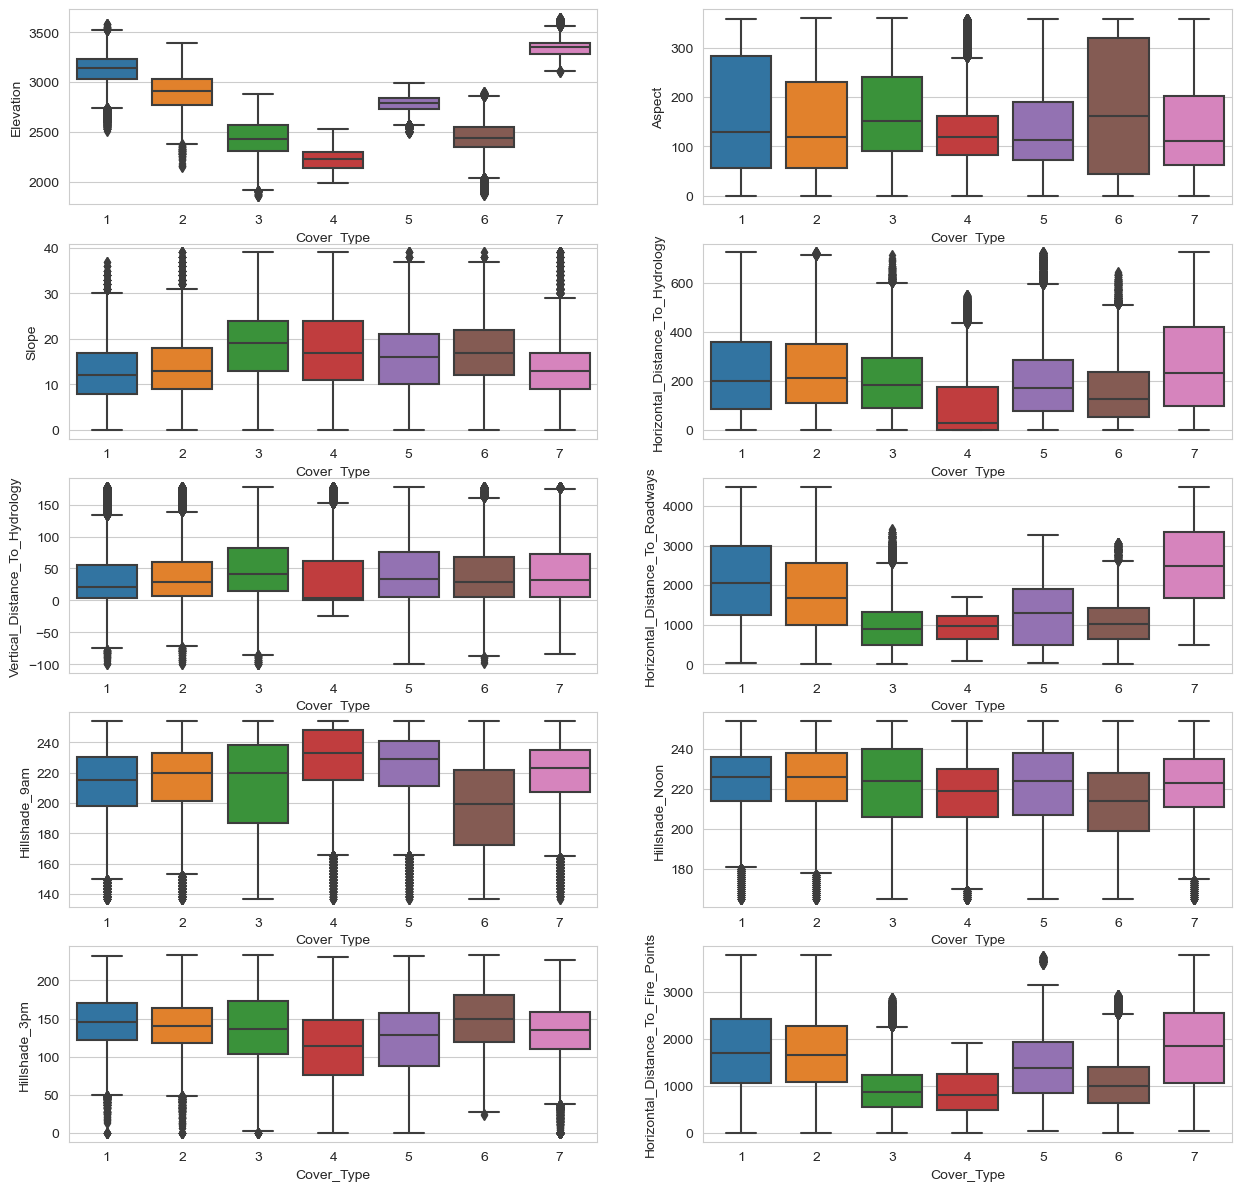

In [16]:
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = tree1[numeric[counter]] , x = tree1["Cover_Type"], ax=ax[i,x],whis=1.5)
        counter +=1

In [17]:
len(tree) - len(tree1) # we dropped so many outliers

48819

In [18]:
tree1 = tree1.reset_index(drop=True)

In [19]:
tree1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
2,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
3,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
4,2855,162,5,85,4,2899,224,241,151,2568,...,0,0,0,0,0,0,0,0,0,2




```
# This is formatted as code
```

### My target column is `Cover_Type`. So let's take a close look at this column.

In [20]:
for i in range(1,8) :
    print("the shape of the value of", i, tree1[tree1["Cover_Type"] == i].shape)

the shape of the value of 1 (25801, 55)
the shape of the value of 2 (25303, 55)
the shape of the value of 3 (28920, 55)
the shape of the value of 4 (33903, 55)
the shape of the value of 5 (30452, 55)
the shape of the value of 6 (31361, 55)
the shape of the value of 7 (25441, 55)


<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

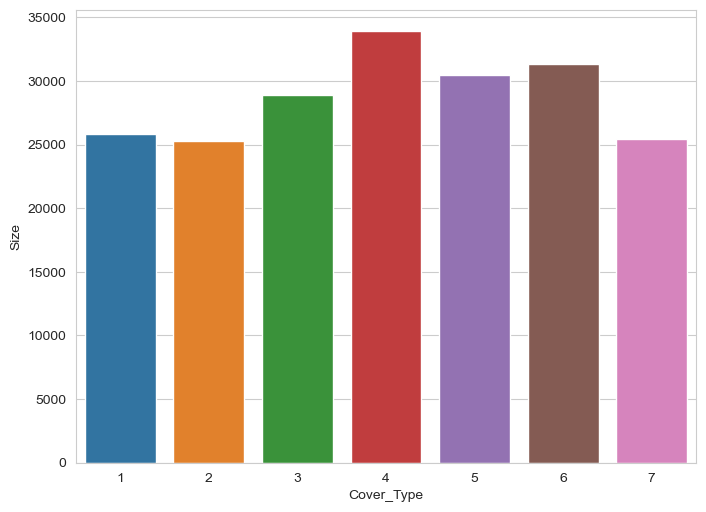

In [21]:
class_tree = tree1.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

In [22]:
for i, number in enumerate(class_tree):
    percent = (number/class_tree.sum())
    print('Cover_Type', class_tree.index[i])
    print('%.2f'% percent)
    
    
    
    

Cover_Type 1
0.13
Cover_Type 2
0.13
Cover_Type 3
0.14
Cover_Type 4
0.17
Cover_Type 5
0.15
Cover_Type 6
0.16
Cover_Type 7
0.13


- We can see that we have balanced data (`Cover_Type`). But, additionally I would like to check the distribution of each class of ``Cover_Type`` in terms of percentages.

### Now, let's take a closer look at correlation of continuous columns.

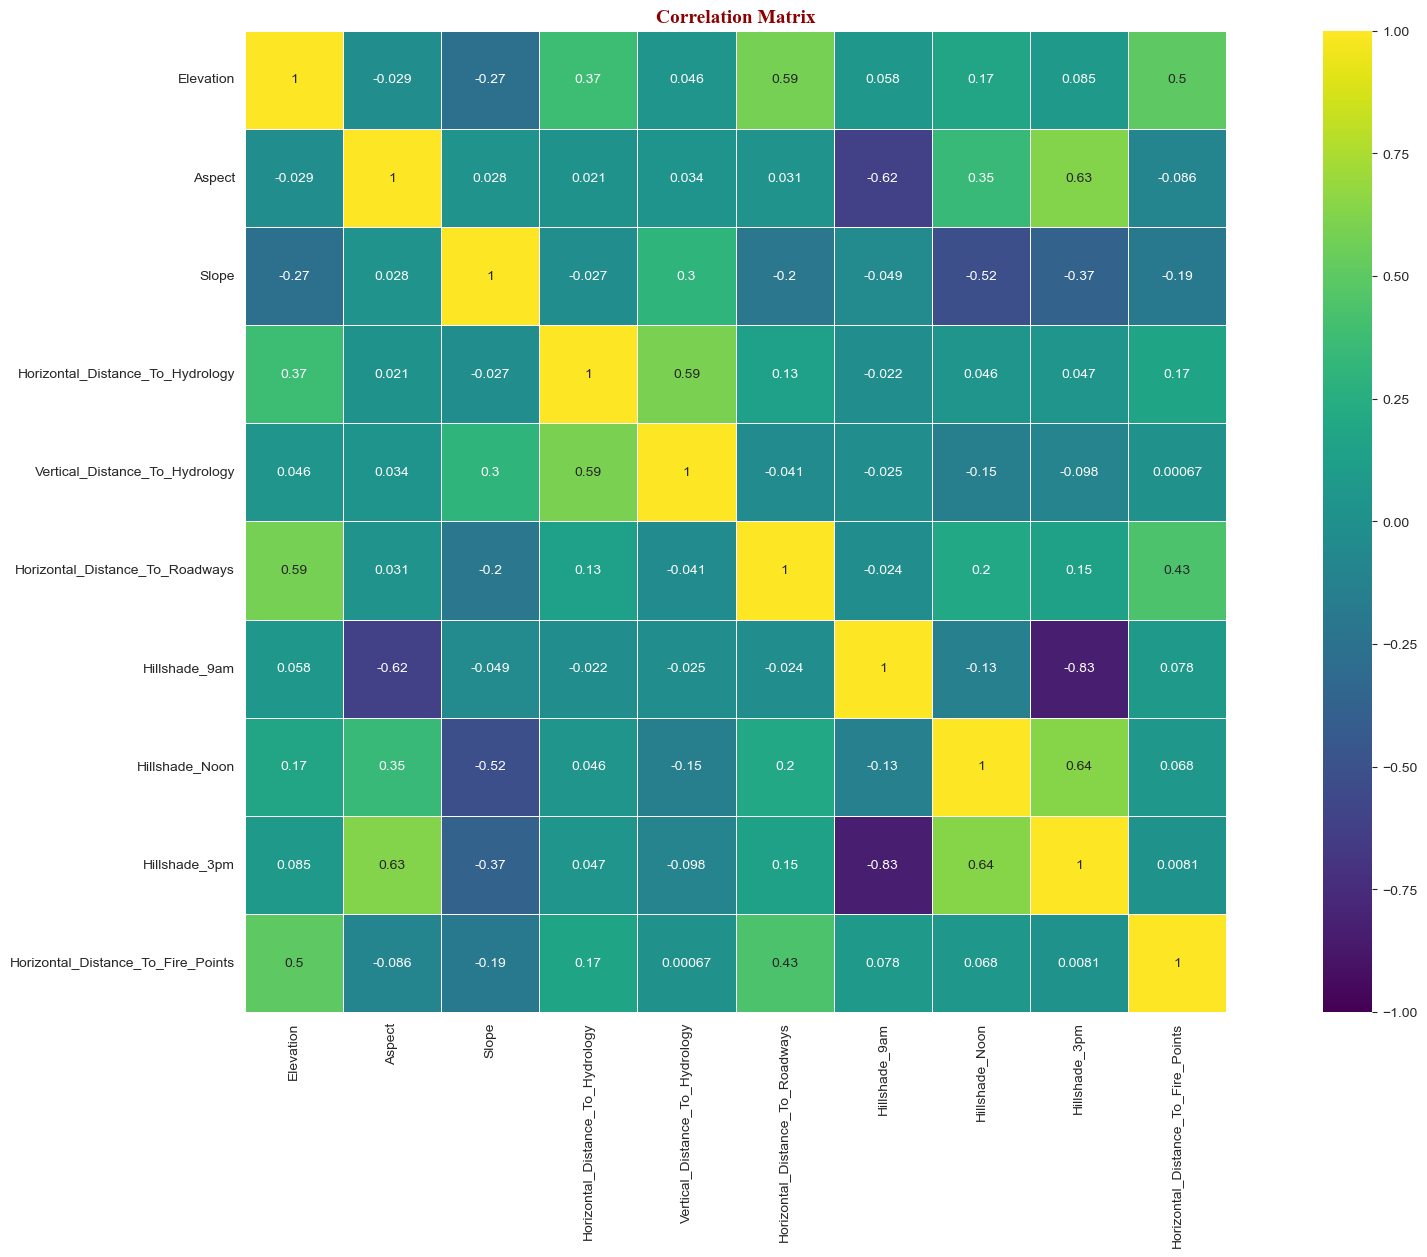

In [23]:
corr_matrix = tree1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

>### Summary results :
>- ``Hillshade_3pm`` and ``Hillshade_9am`` are highly correlated. but I didn't drop it, it can be dropped
>- ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns somehow are not correlated enough, so I decided to transform a new column derived from these two columns.
>- ``Horizontal_Distance_To_Hydrology`` and ``Horizontal_Distance_To_Roadways`` are not correlated, so I decided to transform a new column derived from these two columns.
>- ``Vertical_Distance_To_Hydrology`` and ``Elevation`` are not correlated, so I decided to transform a new column derived from these two columns.

In [24]:
tree1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201181 entries, 0 to 201180
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           201181 non-null  int64
 1   Aspect                              201181 non-null  int64
 2   Slope                               201181 non-null  int64
 3   Horizontal_Distance_To_Hydrology    201181 non-null  int64
 4   Vertical_Distance_To_Hydrology      201181 non-null  int64
 5   Horizontal_Distance_To_Roadways     201181 non-null  int64
 6   Hillshade_9am                       201181 non-null  int64
 7   Hillshade_Noon                      201181 non-null  int64
 8   Hillshade_3pm                       201181 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  201181 non-null  int64
 10  Wilderness_Area_1                   201181 non-null  int64
 11  Wilderness_Area_2                   201181 non-null 

In [25]:
tree1.to_csv("covtype_EDA.csv", index = False)

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Lastly, I will drop unnecessary columns ``'Hillshade_3pm', 'Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type21', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37'``) that I conclued previously.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [26]:
tree1["Square_Hypo_Distance"] = ((tree1.Horizontal_Distance_To_Hydrology ** 2) + 
                                 (tree1.Vertical_Distance_To_Hydrology ** 2))

In [27]:
tree1["Average_Dist_Road_Hydro"] = (tree1.Horizontal_Distance_To_Hydrology + tree1.Horizontal_Distance_To_Roadways)/2 

In [28]:
tree1["Average_Elevation_Hydro"] = (tree1.Elevation + tree1.Vertical_Distance_To_Hydrology) /2

In [29]:
tree1.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [30]:
numeric = []

for col in tree1.columns:
    if tree1[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Square_Hypo_Distance', 'Average_Dist_Road_Hydro', 'Average_Elevation_Hydro']


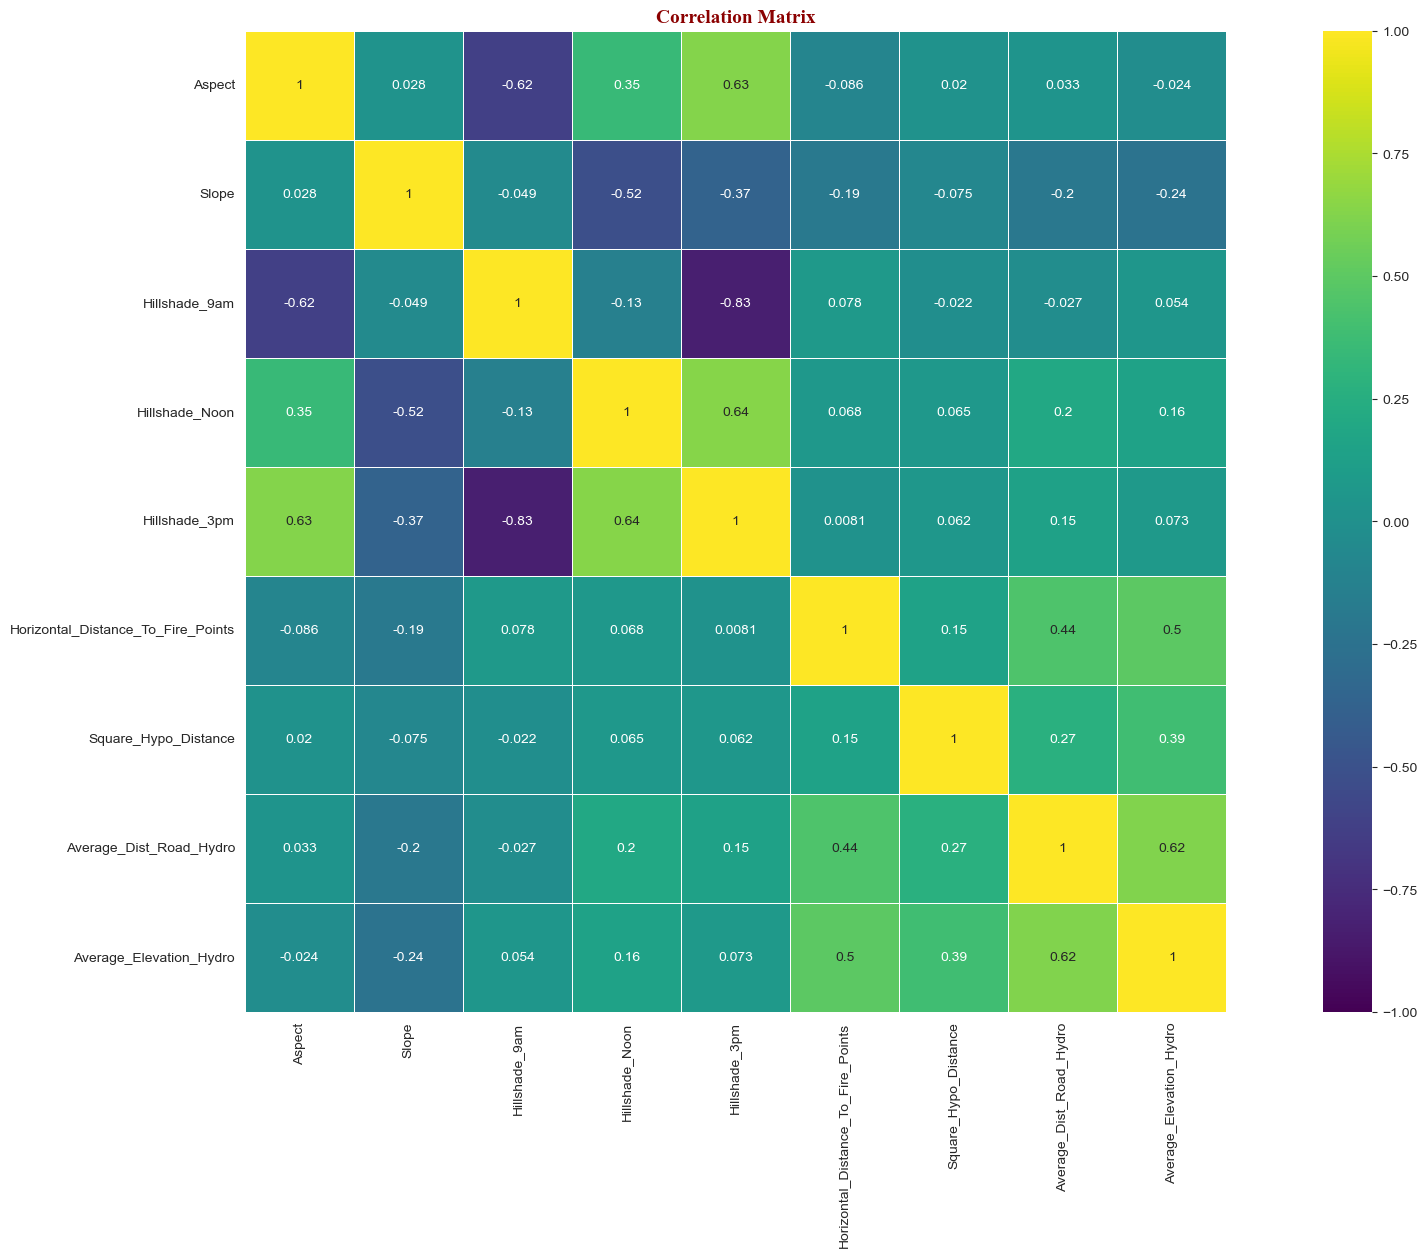

In [31]:
corr_matrix = tree1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

In [32]:
tree1.to_csv("covtype2.csv", index = False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [34]:
df = pd.read_csv("covtype2.csv")

In [35]:
df.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,123,10,237,231,123,2113,0,0,1,0,...,0,0,0,0,0,0,6,47248,1228.5,1372.0
1,322,18,170,217,185,1330,1,0,0,0,...,0,0,0,1,0,0,7,130532,2357.5,1693.5
2,89,31,248,173,29,889,0,0,1,0,...,0,0,0,0,0,0,5,103525,795.0,1511.0
3,93,12,239,221,110,945,0,0,1,0,...,0,0,0,0,0,0,7,270973,538.5,1683.0
4,162,5,224,241,151,2568,1,0,0,0,...,0,0,0,0,0,0,2,7241,1492.0,1429.5


In [36]:
X = df.drop("Cover_Type", axis = 1)

y = df["Cover_Type"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [38]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import BaggingClassifier
modelSVM = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5) 
# we drop the model computional complexity with bagging and that gives us better time and better accuracy

In [43]:
modelSVM.fit(X_train_scaled , y_train)

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.1,
                  n_estimators=5, n_jobs=-1)

In [44]:
y_pred_test = modelSVM.predict(X_test_scaled)
y_pred_train = modelSVM.predict(X_train_scaled)

TEST REPORT
              precision    recall  f1-score   support

           1       0.64      0.67      0.65      7740
           2       0.56      0.50      0.53      7591
           3       0.60      0.53      0.56      8676
           4       0.80      0.92      0.86     10171
           5       0.73      0.78      0.75      9136
           6       0.66      0.65      0.65      9409
           7       0.88      0.84      0.86      7632

    accuracy                           0.70     60355
   macro avg       0.70      0.70      0.70     60355
weighted avg       0.70      0.70      0.70     60355




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.64      0.67      0.66     18061
           2       0.57      0.50      0.53     17712
           3       0.60      0.52      0.56     20244
           4       0.80      0.91      0.86     23732
           5       0.73      0.78      0.7

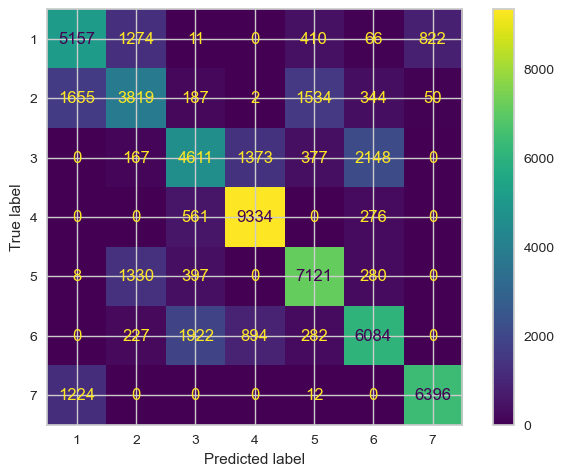

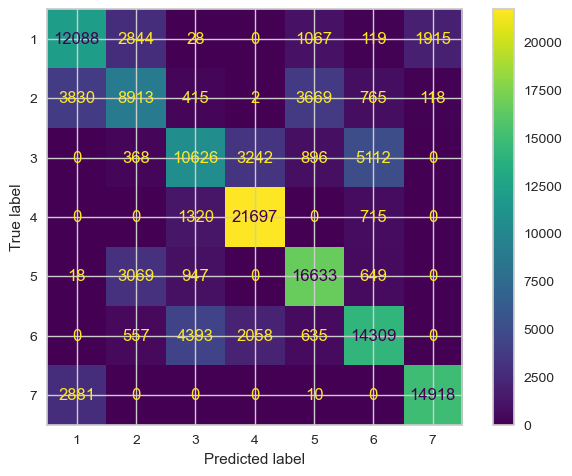

In [46]:

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelSVM, X_test_scaled, y_test);

print("\n"*3, "-*"*30)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelSVM, X_train_scaled, y_train);

In [47]:
param_grid = {
    'base_estimator__C': np.linspace(0.01,1, 3),
}

In [49]:
from sklearn.model_selection import GridSearchCV
model = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5,random_state=6)
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="f1_macro",
                              n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                         max_samples=0.1, n_estimators=5,
                                         n_jobs=-1, random_state=6),
             n_jobs=-1,
             param_grid={'base_estimator__C': array([0.01 , 0.505, 1.   ])},
             scoring='f1_macro', verbose=2)

In [50]:
svm_model_grid.best_params_

{'base_estimator__C': 1.0}

In [51]:
svm_model_grid.best_estimator_

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.1,
                  n_estimators=5, n_jobs=-1, random_state=6)

In [52]:
y_pred_test = svm_model_grid.predict(X_test_scaled)
y_pred_train = svm_model_grid.predict(X_train_scaled)

TEST REPORT
              precision    recall  f1-score   support

           1       0.64      0.66      0.65      7740
           2       0.58      0.49      0.53      7591
           3       0.59      0.54      0.56      8676
           4       0.80      0.92      0.86     10171
           5       0.73      0.79      0.76      9136
           6       0.66      0.65      0.65      9409
           7       0.88      0.82      0.85      7632

    accuracy                           0.70     60355
   macro avg       0.70      0.70      0.70     60355
weighted avg       0.70      0.70      0.70     60355




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.64      0.66      0.65     18061
           2       0.58      0.49      0.53     17712
           3       0.59      0.53      0.56     20244
           4       0.80      0.92      0.86     23732
           5       0.72      0.79      0.7

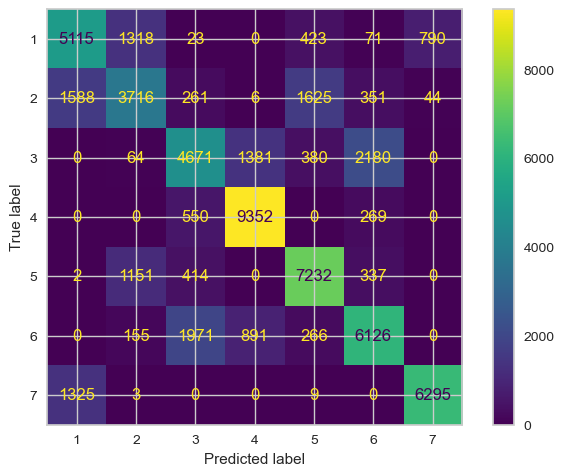

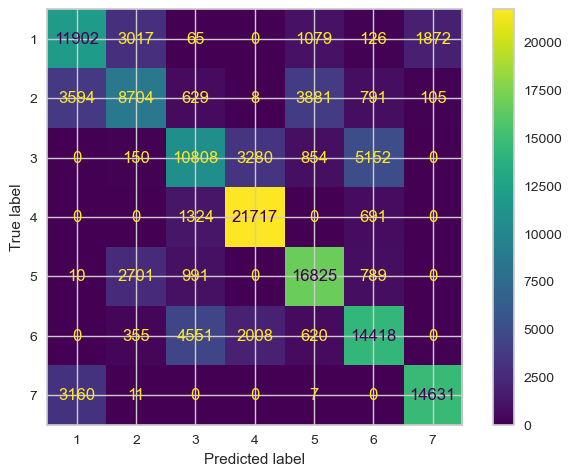

In [54]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svm_model_grid, X_train_scaled, y_train);

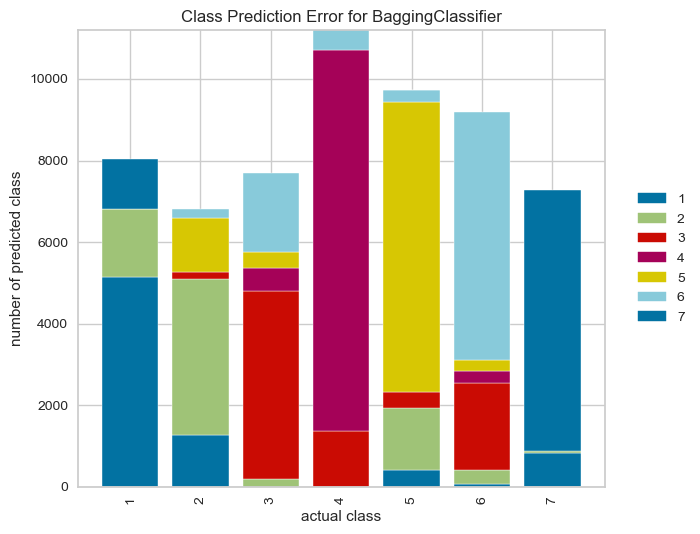

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [55]:
from yellowbrick.classifier import ClassPredictionError


visualizer = ClassPredictionError(modelSVM)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()



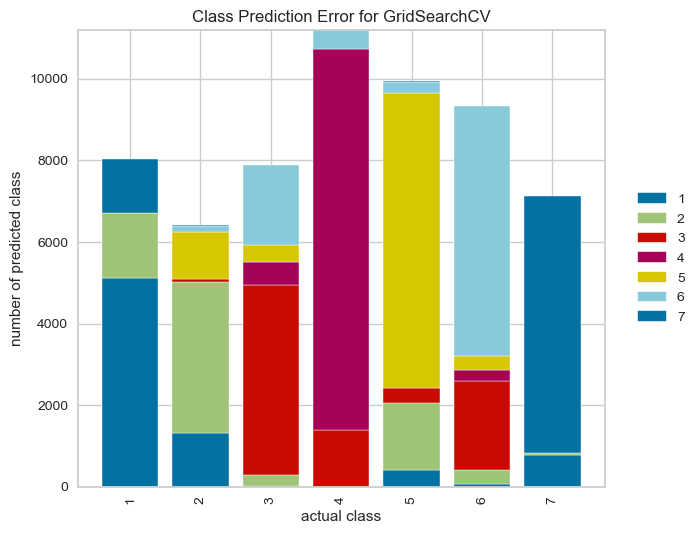

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [56]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()


### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [57]:
modelTree = DecisionTreeClassifier()

modelTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [58]:
modelTree = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=10)

modelTree.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.1,
                  n_jobs=-1)

In [59]:
y_pred_test = modelTree.predict(X_test)
y_pred_train = modelTree.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.77      0.80      0.79      7740
           2       0.81      0.64      0.72      7591
           3       0.88      0.88      0.88      8676
           4       0.96      0.99      0.97     10171
           5       0.91      0.98      0.94      9136
           6       0.89      0.90      0.90      9409
           7       0.95      0.97      0.96      7632

    accuracy                           0.89     60355
   macro avg       0.88      0.88      0.88     60355
weighted avg       0.89      0.89      0.89     60355




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.81      0.84      0.83     18061
           2       0.85      0.71      0.77     17712
           3       0.91      0.91      0.91     20244
           4       0.97      0.99      0.98     23732
           5       0.93      0.98      0.9

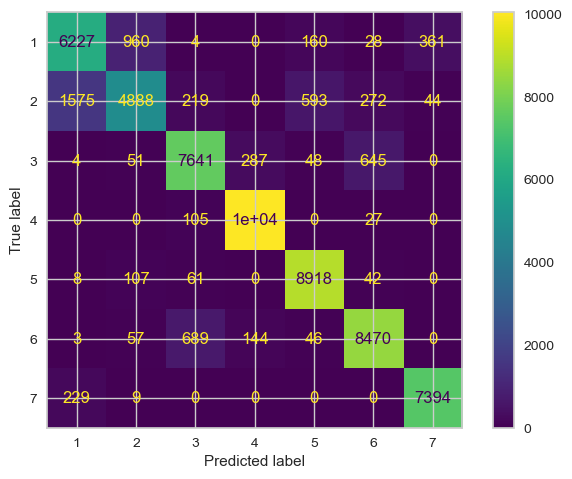

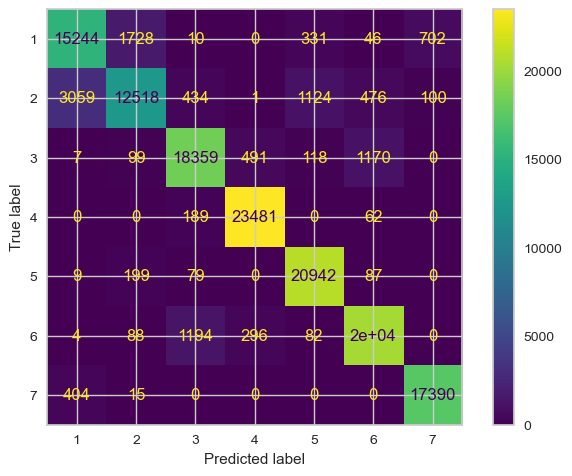

In [61]:

print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelTree, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelTree, X_train, y_train);

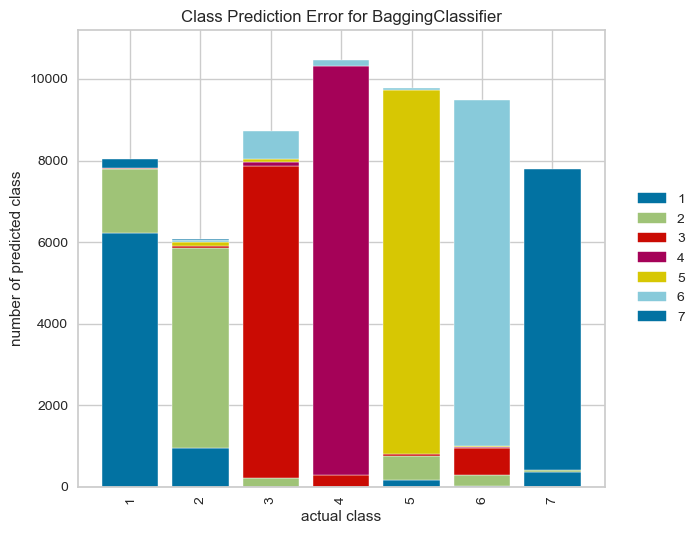

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [62]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [63]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.91      0.88      0.90      7740
           2       0.89      0.85      0.87      7591
           3       0.96      0.95      0.95      8676
           4       0.98      1.00      0.99     10171
           5       0.97      0.99      0.98      9136
           6       0.95      0.98      0.96      9409
           7       0.98      1.00      0.99      7632

    accuracy                           0.95     60355
   macro avg       0.95      0.95      0.95     60355
weighted avg       0.95      0.95      0.95     60355




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18061
           2       1.00      1.00      1.00     17712
           3       1.00      1.00      1.00     20244
           4       1.00      1.00      1.00     23732
           5       1.00      1.00      1.0

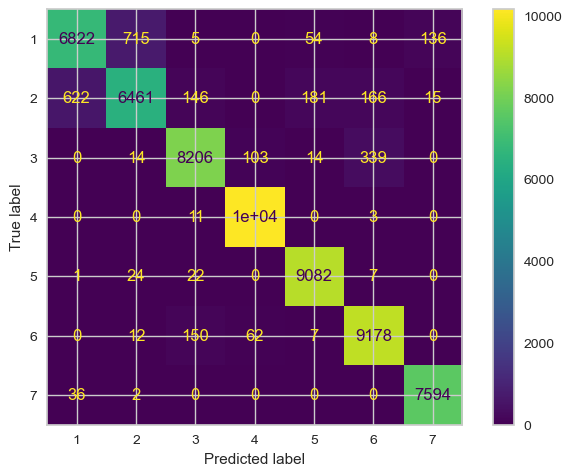

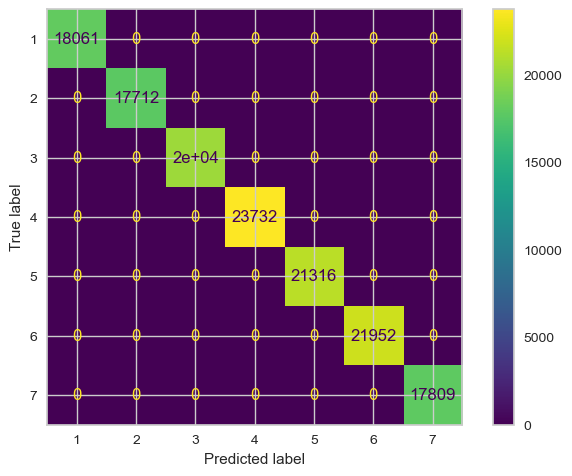

In [66]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rfc, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rfc, X_train, y_train);

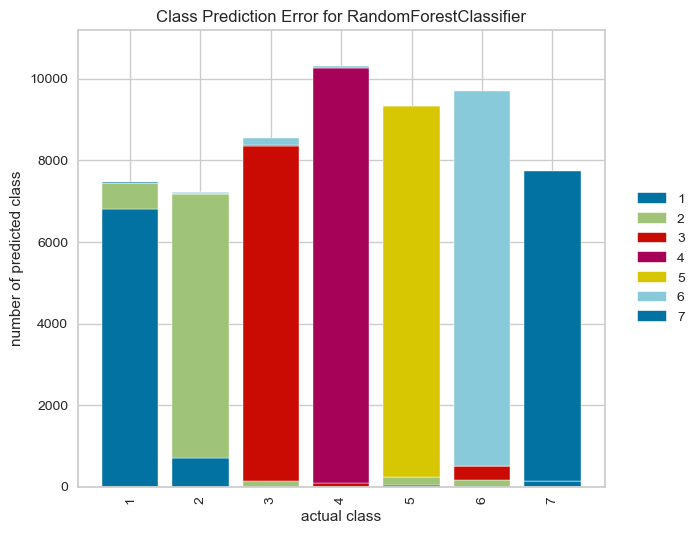

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [67]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### RF GridsearchCV

In [68]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }

In [69]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [70]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 2,
 'n_estimators': 200}

In [71]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [72]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.914804075884351, 0.9530413417976794, 0.9088449789766312, 0.9506952389553416)

TEST REPORT
              precision    recall  f1-score   support

           1       0.87      0.82      0.84      7740
           2       0.85      0.74      0.79      7591
           3       0.93      0.87      0.90      8676
           4       0.96      0.99      0.98     10171
           5       0.91      0.99      0.95      9136
           6       0.89      0.95      0.92      9409
           7       0.96      0.99      0.98      7632

    accuracy                           0.91     60355
   macro avg       0.91      0.91      0.91     60355
weighted avg       0.91      0.91      0.91     60355




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.95      0.90      0.92     18061
           2       0.93      0.86      0.89     17712
           3       0.97      0.92      0.94     20244
           4       0.98      1.00      0.99     23732
           5       0.93      0.99      0.9

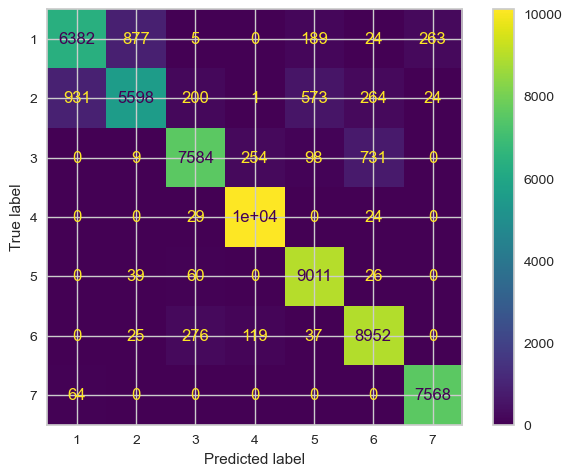

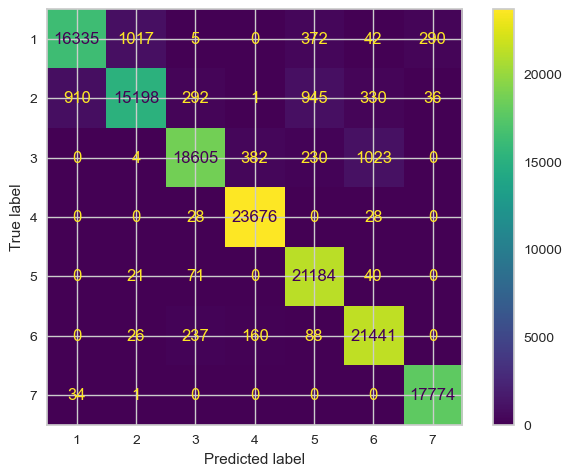

In [73]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf_grid_model, X_train, y_train);

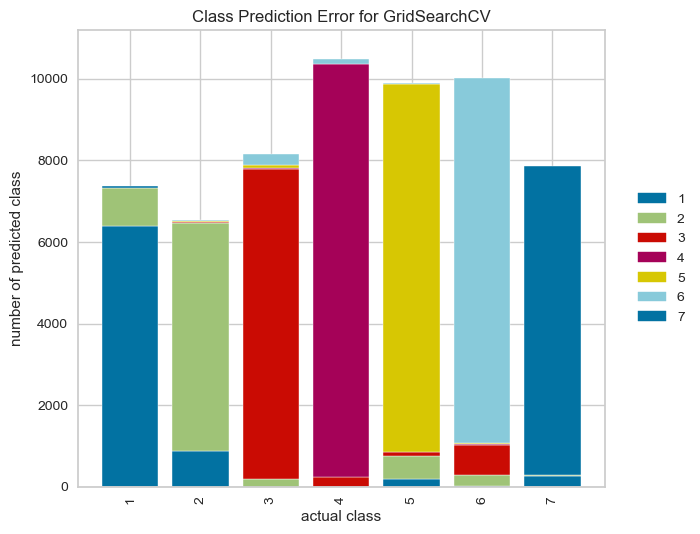

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [74]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [75]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

[05:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [76]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.84      0.82      0.83      7740
           2       0.84      0.74      0.79      7591
           3       0.92      0.87      0.90      8676
           4       0.98      1.00      0.99     10171
           5       0.94      0.99      0.96      9136
           6       0.89      0.95      0.92      9409
           7       0.96      0.99      0.98      7632

    accuracy                           0.91     60355
   macro avg       0.91      0.91      0.91     60355
weighted avg       0.91      0.91      0.91     60355




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.88      0.87      0.88     18061
           2       0.89      0.80      0.85     17712
           3       0.95      0.90      0.93     20244
           4       0.99      1.00      0.99     23732
           5       0.95      0.99      0.9

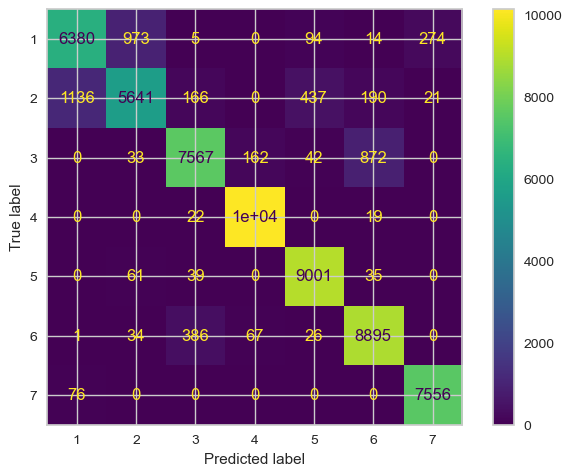

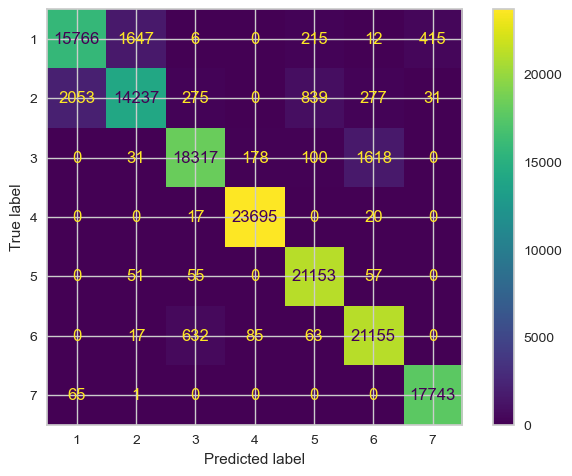

In [78]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

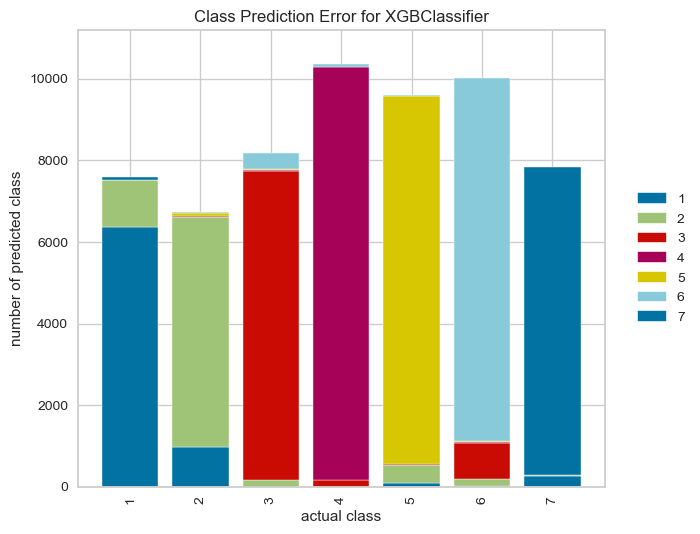

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [79]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

Text(0.5, 1.0, 'Test Accuracy Score of Different Models')

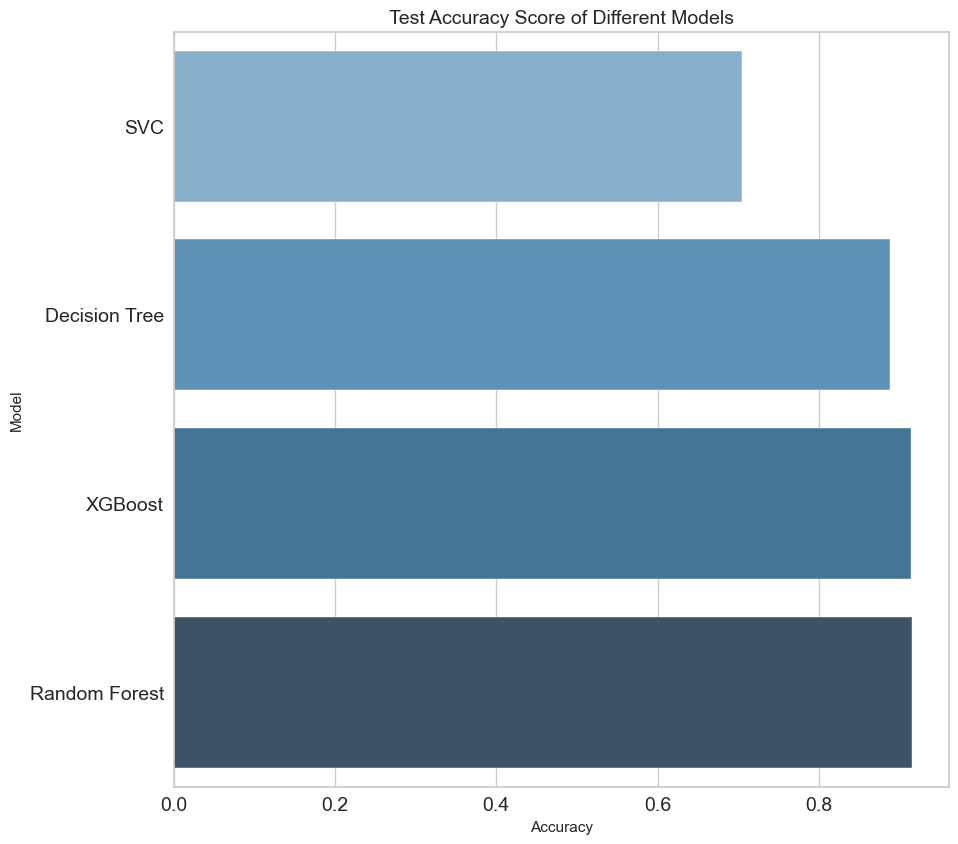

In [80]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14)

Text(0.5, 1.0, 'Train Accuracy Score of Different Models')

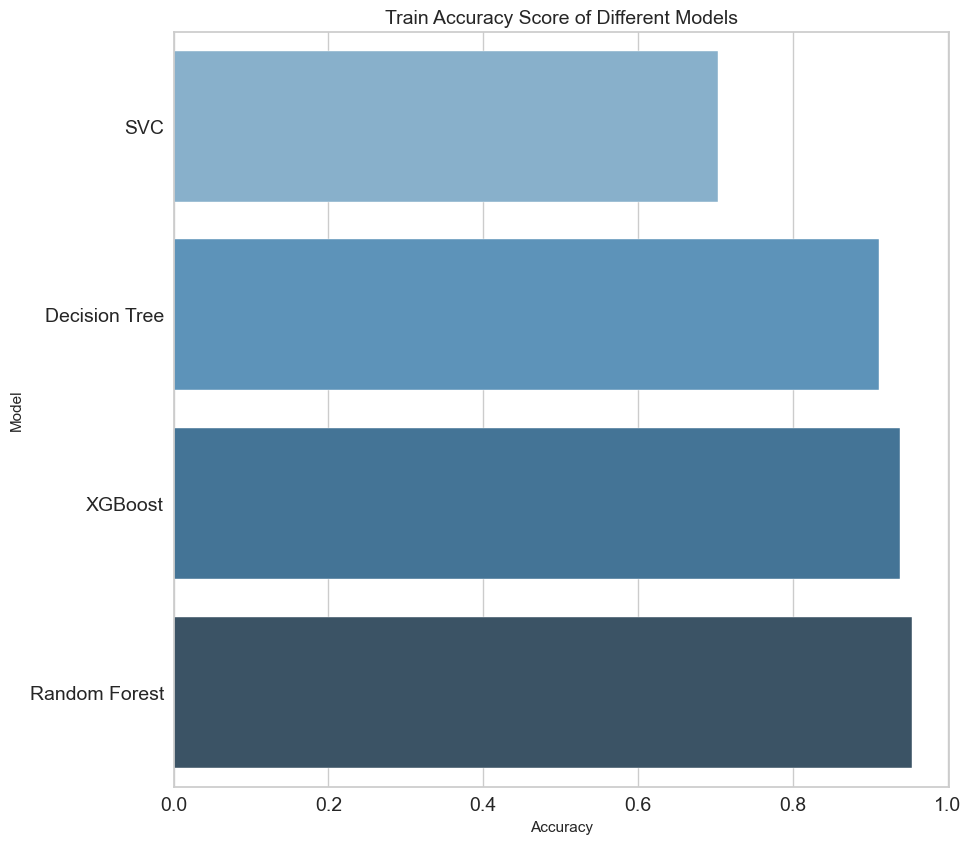

In [81]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_train, rfc_accuracy_train, xgb_accuracy_train, modelTree_accuracy_train]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train Accuracy Score of Different Models", size=14)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___